# Visualize BEV using heatmaps
## Based on height_compression.py file using spatial features from batch_dict

In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the aggregated features from the pickle file
with open('/mnt/data/adat01/3diou_proto_ssda/pkl_files/spatial_features.pkl', 'rb') as file:
    aggregated_features = pickle.load(file)

# aggregated_features.keys()


/mnt/data/anaconda3/envs/adat_pcdetv5/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
aggregated_features[0].shape # contains 256 scenes

torch.Size([256, 200, 176])

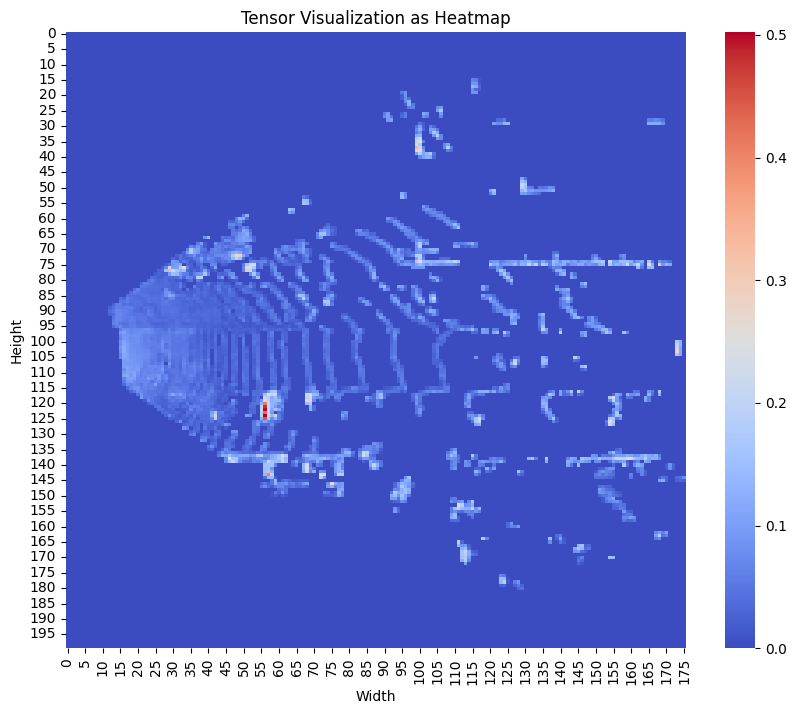

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For single scene
# Scene list : array(['001087', '002410', '007414', '000214'], dtype='<U6')
tensor_data = aggregated_features[3].cpu()  #Spatial_features

# Create a figure and axes for the heatmap
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(tensor_data.mean(axis=0), cmap='coolwarm')  # You can use other colormaps like 'hot', 'coolwarm', etc.
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Tensor Visualization as Heatmap')

plt.show()


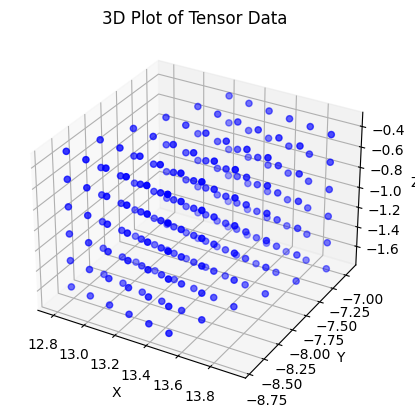

In [4]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pooled points and Pooled features 
with open('/mnt/data/adat01/3diou_proto_ssda/pkl_files/pooled_points.pkl', 'rb') as file:
    pooled_points = pickle.load(file)

# Load the aggregated features from the pickle file
with open('/mnt/data/adat01/3diou_proto_ssda/pkl_files/pooled_features.pkl', 'rb') as file:
    pooled_features = pickle.load(file)

pooled_points = pooled_points.view(-1,216,3).cpu()[1]
pooled_features = pooled_features.cpu()[1]

# Extract the x, y, z coordinates from the tensor
x = pooled_points[:, 0]
y = pooled_points[:, 1]
z = pooled_points[:, 2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
ax.scatter(x, y, z, c='b', marker='o')

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title of the plot
ax.set_title('3D Plot of Tensor Data')

# Display the plot
plt.show()

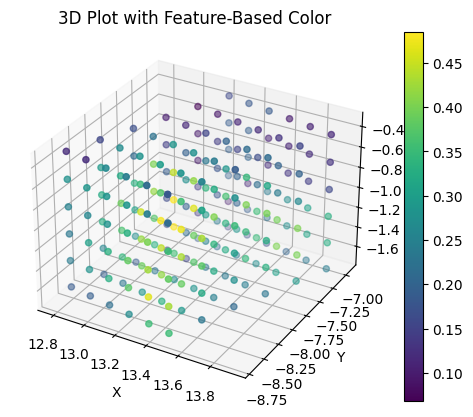

In [5]:

# Normalize the feature values to use them for color or point size
feature_values = pooled_features.mean(axis=1) 

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D, adjusting the color based on feature values
scatter = ax.scatter(x, y, z, c=feature_values, cmap='viridis', marker='o')

# Add a colorbar to show the feature value mapping
plt.colorbar(scatter)

# Set labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title of the plot
ax.set_title('3D Plot with Feature-Based Color')

# Display the plot
plt.show()

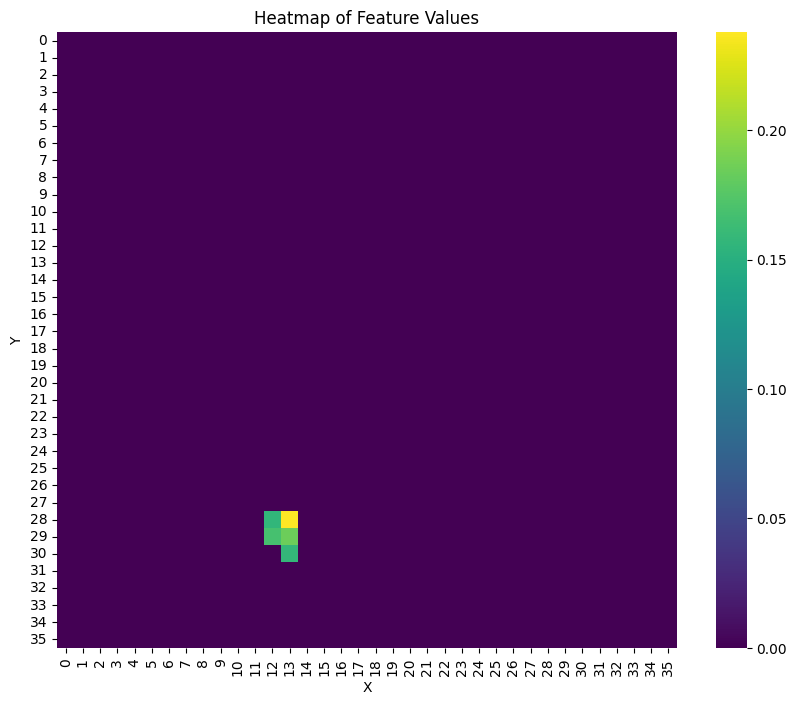

In [6]:
import numpy as np
# Create a heatmap
heatmap_data = np.zeros((len(np.unique(y)), len(np.unique(x))))  # Assuming x and y are evenly spaced
for i, (xi, yi) in enumerate(zip(x, y)):
    heatmap_data[int(yi), int(xi)] = feature_values[i]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Feature Values')
plt.show()

In [7]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the aggregated features from the pickle file
with open('/mnt/data/adat01/3diou_proto_ssda/pkl_files/pooled_points.pkl', 'rb') as file:
    pooled_points = pickle.load(file)

# Load the aggregated features from the pickle file
with open('/mnt/data/adat01/3diou_proto_ssda/pkl_files/pooled_features.pkl', 'rb') as file:
    pooled_features = pickle.load(file)

pooled_points = pooled_points.view(-1,216,3).cpu()[:100]
pooled_features = pooled_features.cpu()[:100]

# Find the maximum x and y values from all tensors
max_x = np.max(pooled_points[:, :, 0].numpy())
max_y = np.max(pooled_points[:, :, 1].numpy())

num_tensors = pooled_features.shape[0]

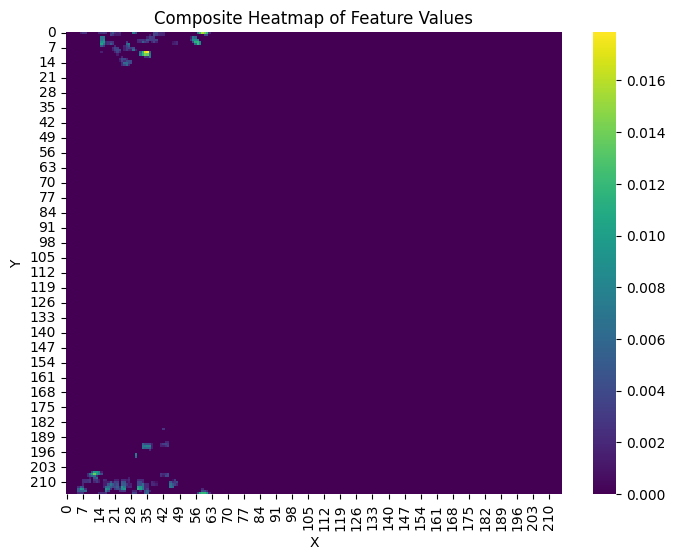

In [8]:
# Create a composite heatmap
heatmap_data = np.zeros((216,216))
for coords, features in zip(pooled_points, pooled_features):
    # print(coords.shape)
    x = coords[:, 0].flatten()
    # print(x.shape)
    y = coords[:, 1].flatten()
    feature_values = features.mean(axis=1).flatten()  # Use an appropriate aggregation method
    # print(feature_values.shape)

    # Create a heatmap for the current tensor
    tensor_heatmap = np.zeros((216,216))
    for xi, yi, val in zip(x, y, feature_values):
        tensor_heatmap[int(yi), int(xi)] = val

    heatmap_data += tensor_heatmap 
# Normalize the heatmap data
heatmap_data /= pooled_features.shape[0]

# Plot the composite heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='viridis', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Composite Heatmap of Feature Values')

plt.show()

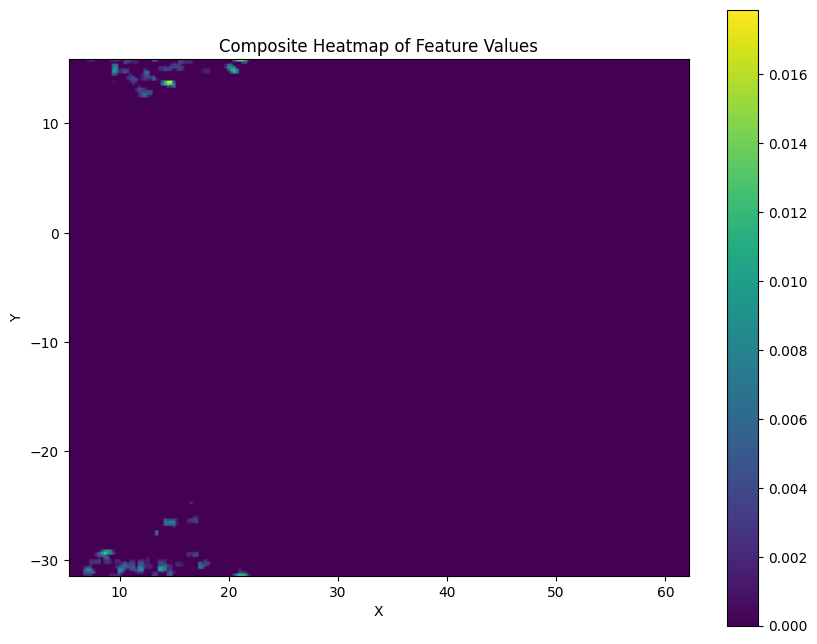

In [9]:
# Create a composite heatmap
heatmap_data = np.zeros((216,216))
for coords, features in zip(pooled_points, pooled_features):
    # print(coords.shape)
    x = coords[:, 0].flatten()
    # print(x.shape)
    y = coords[:, 1].flatten()
    feature_values = features.mean(axis=1).flatten()  # Use an appropriate aggregation method
    # print(feature_values.shape)

    # Create a heatmap for the current tensor
    tensor_heatmap = np.zeros((216,216))
    for xi, yi, val in zip(x, y, feature_values):
        tensor_heatmap[int(yi), int(xi)] = val

    heatmap_data += tensor_heatmap 

# Normalize the heatmap data
heatmap_data /= num_tensors

# Define the extent of the heatmap axis
x_extent = [np.min(pooled_points[:, :, 0].numpy()), np.max(pooled_points[:, :, 0].numpy())]
y_extent = [np.min(pooled_points[:, :, 1].numpy()), np.max(pooled_points[:, :, 1].numpy())]

# Plot the composite heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, cmap='viridis', extent=[x_extent[0], x_extent[1], y_extent[0], y_extent[1]])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Composite Heatmap of Feature Values')
plt.show()

Visualizing local and global pooled_features

In [10]:
# tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
#          2., 2., 2., 2., 3., 3., 3., 3., 3.],
#         [3., 1., 1., 1., 1., 1., 1., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
#          0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')  -> Fixed GT labels 
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Load the pickle file
with open('/mnt/data/adat01/3diou_proto_ssda/output/kitti_models/pv_rcnn_ssl_60/consistency_debug_89dc3e5/features_points_new.pkl', 'rb') as file:
    data = pickle.load(file)

# # Access the keys and their corresponding values
# local_roi_grid_points = data['local_roi_grid_points'].cpu()
# pooled_features = data['pooled_features'].cpu()

# # Print the shapes of the tensors
# print("local_roi_grid_points shape:", local_roi_grid_points.shape)
# print("pooled_features shape:", pooled_features.shape)


In [11]:
data['global_roi_grid_points'].cpu().shape

torch.Size([37, 216, 3])

#### Check the shape of pooled features

In [12]:
data['pooled_features'].shape

torch.Size([37, 216, 128])

#### This sample number fetched the feature, gri d point coords etc for a particular GT box

In [14]:
local_roi_grid_points = data['local_roi_grid_points'].cpu()
local_roi_grid_points.shape

torch.Size([37, 216, 3])

In [15]:
global_roi_grid_points = data['global_roi_grid_points'].cpu()
global_roi_grid_points.shape

torch.Size([37, 216, 3])

In [16]:
data['valid_gt_boxes'][28,-1]

tensor(1., device='cuda:0')

In [17]:
data['pooled_features'].shape

torch.Size([37, 216, 128])

In [18]:
#Overwriting PL values
for idx,i in enumerate(data['valid_gt_boxes']):
    if idx>27:
        data['valid_gt_boxes'][idx,-1]= torch.zeros_like(data['valid_gt_boxes'][28,-1])

In [65]:
sample_num = 2
data['valid_gt_boxes'][sample_num,-1]

tensor(1., device='cuda:0')

## Projecting Pooled Features for a given sample over local ROI grid 


Min/Max values of local coordinates of this ROI: 
min_x: -1.75, max_x: 1.75, scale_x: 3.51
min_y: -0.69, max_y: 0.69, scale_y: 1.38
min_z: -0.63, max_z: 0.63, scale_z: 1.26


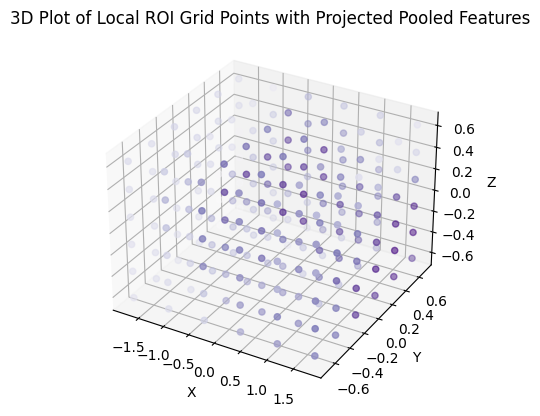

In [77]:
local_roi_grid_points = data['local_roi_grid_points'].cpu()
global_roi_grid_points = data['global_roi_grid_points'].cpu()
pooled_features = data['pooled_features'].cpu()

local_roi_grid_points = local_roi_grid_points[sample_num]
global_roi_grid_points = local_roi_grid_points[sample_num]
pooled_features = pooled_features[sample_num]

# Compute the mean over the last dimension
mean_pooled_features = np.mean(pooled_features.numpy(), axis=-1)

# Project the mean_pooled_features onto the coordinates
projected_pooled_features = mean_pooled_features.reshape((-1, 1))

# Create a dummy scatter plot for colorbar creation

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
x = local_roi_grid_points[:, 0].flatten()
y = local_roi_grid_points[:, 1].flatten()
z = local_roi_grid_points[:, 2].flatten()
print("Min/Max values of local coordinates of this ROI: ")
print("min_x: {:.2f}, max_x: {:.2f}, scale_x: {:.2f}".format(torch.min(x), torch.max(x), torch.max(x)*2))
print("min_y: {:.2f}, max_y: {:.2f}, scale_y: {:.2f}".format(torch.min(y), torch.max(y), torch.max(y)*2))
print("min_z: {:.2f}, max_z: {:.2f}, scale_z: {:.2f}".format(torch.min(z), torch.max(z), torch.max(z)*2))

ax.scatter(x, y, z, c=projected_pooled_features.flatten(), cmap='Purples')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Plot of Local ROI Grid Points with Projected Pooled Features')

# Show the plot
plt.show()


In [20]:
data.keys()

dict_keys(['local_roi_grid_points', 'global_roi_grid_points', 'pooled_features', 'valid_gt_boxes', 'spatial_features_2d'])

In [21]:
pooled_features = data['pooled_features'].cpu()  # Shape: [27, 216, 128]
pooled_features.shape

torch.Size([37, 216, 128])

In [41]:
labels = data['valid_gt_boxes'][:,-1]
car_indices = torch.nonzero(labels == 1)
ped_indices = torch.nonzero(labels == 2)
cyc_indices = torch.nonzero(labels == 3)


In [51]:
pooled_features = data['pooled_features'].cpu()  # Shape: [37, 216, 128]
valid_gt_mask = data['valid_gt_boxes'][:,-1]

pooled_features_car = pooled_features[car_indices.squeeze(),...]
pooled_features_ped = pooled_features[ped_indices.squeeze(),...]
pooled_features_cyc = pooled_features[cyc_indices.squeeze(),...]

# pooled_features_cls_agn = torch.cat([pooled_features_car, pooled_features_ped, pooled_features_cyc], dim=0)


## Projecting classwise pooled_features over 3D local grid points

## TODO Bugfix - create scatter plots for pooling around global roi grid points

In [58]:

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')


# # Plot the points
# x = global_roi_grid_points.view(-1, 3)[:, 0].flatten()
# y = global_roi_grid_points.view(-1, 3)[:, 1].flatten()
# z = global_roi_grid_points.view(-1, 3)[:, 2].flatten()
# print("Min/Max values of local coordinates of this ROI: ")
# print("min_x: {:.2f}, max_x: {:.2f}, scale_x: {:.2f}".format(torch.min(x), torch.max(x), torch.max(x)*2))
# print("min_y: {:.2f}, max_y: {:.2f}, scale_y: {:.2f}".format(torch.min(y), torch.max(y), torch.max(y)*2))
# print("min_z: {:.2f}, max_z: {:.2f}, scale_z: {:.2f}".format(torch.min(z), torch.max(z), torch.max(z)*2))

# ax.scatter(x, y, z, c=projected_pooled_features.flatten().repeat(37), cmap='Purples')

# # Set labels and title
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.title('3D Plot of Global ROI Grid Points with Projected Pooled Features')

# # Add a colorbar
# cbar = plt.colorbar(dummy_scatter)
# cbar.set_label('Projected Pooled Features')

# # Show the plot
# plt.show()


#### Idea: Try K means clustering for the pooled features and see if we can see three clear clusters for each class

/mnt/data/anaconda3/envs/adat_pcdetv5/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


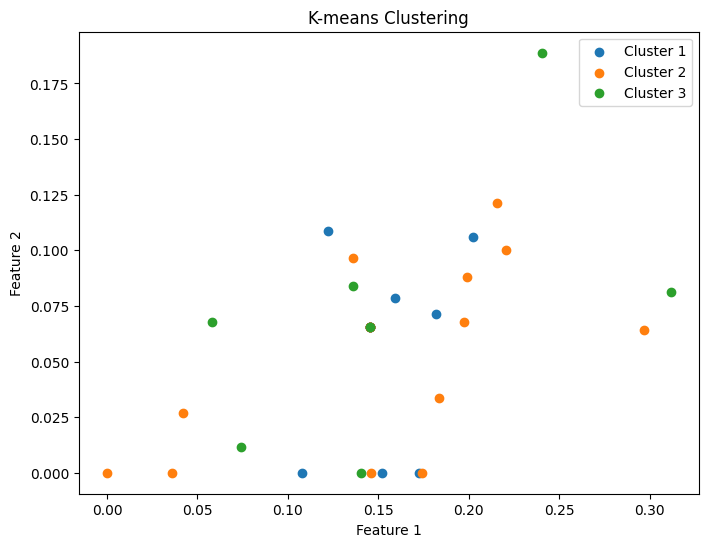

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Reshape the tensor to [20, 27648]
reshaped_tensor = np.reshape(data['pooled_features'].cpu(), (data['pooled_features'].cpu().shape[0], -1))

# Normalize the data
normalized_data = (reshaped_tensor - reshaped_tensor.min()) / (reshaped_tensor.max() - reshaped_tensor.min())

# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_data)

# Obtain cluster assignments for each object
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Iterate over each cluster and plot the objects assigned to it
for cluster in range(3):
    cluster_objects = normalized_data[cluster_labels == cluster]
    plt.scatter(cluster_objects[:, 0], cluster_objects[:, 1], label=f'Cluster {cluster + 1}')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


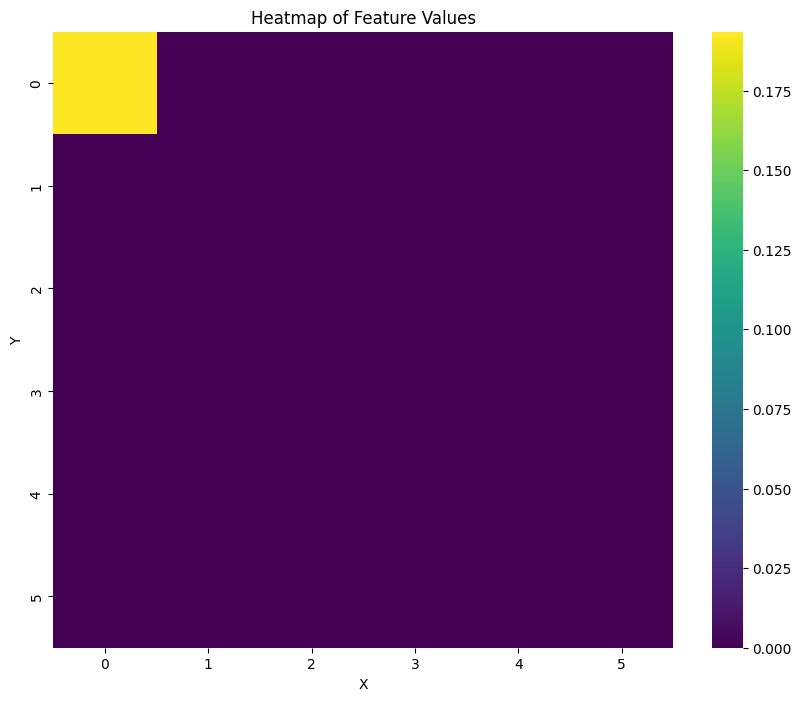

In [ ]:
# Create a heatmAP
feature_values = pooled_features.mean(axis=1) 

x = local_roi_grid_points[:, 0].flatten()
y = local_roi_grid_points[:, 1].flatten()

heatmap_data = np.zeros((len(np.unique(y)), len(np.unique(x))))  # Assuming x and y are evenly spaced
for i, (xi, yi) in enumerate(zip(x, y)):
    heatmap_data[int(yi), int(xi)] = feature_values[i]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')

plt.title('Heatmap of Feature Values')
plt.show()